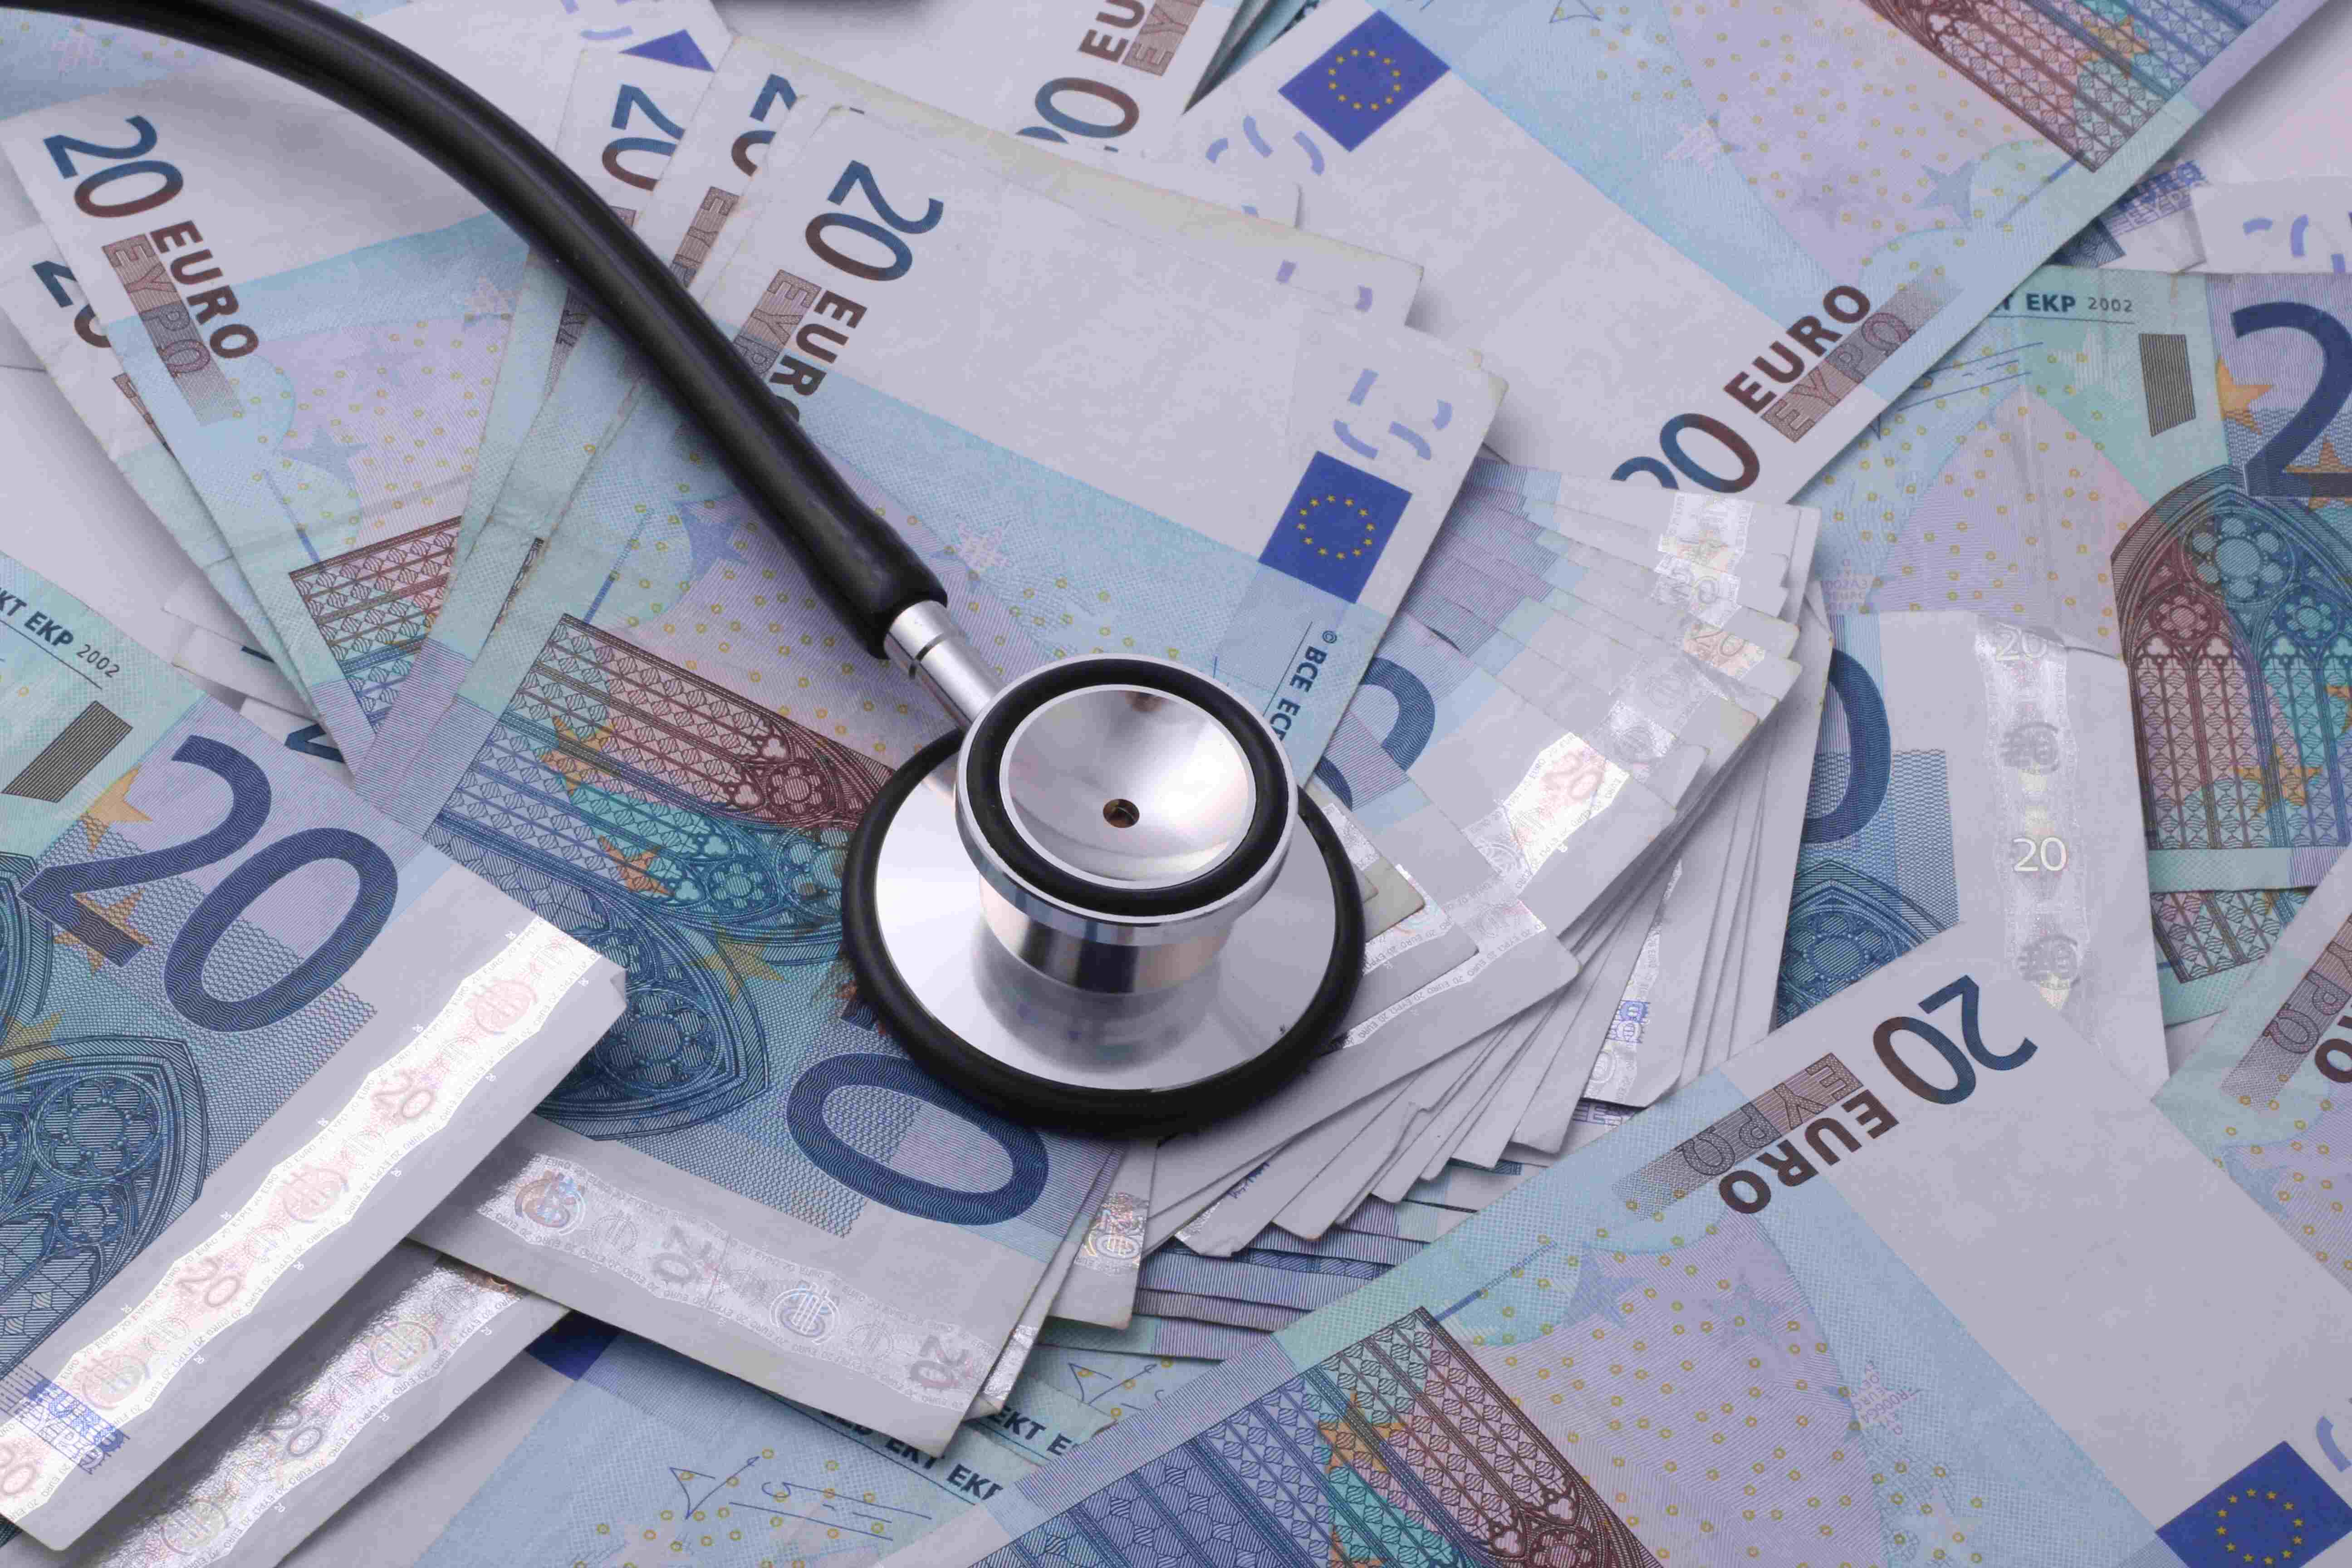

**The aim of this model is to study the medical expense of patients by analysing different parameters. A complete EDA is carried out to know the dependence of the cost and to build model for prediction.**

# **Variable Description**

**age** : The age of the patients

**sex** : If the patient is Male or Female

**bmi** : BMI count of the patient

**children** : No. of kids the patient have

**smoker** : If the patient Smokes or not

**region** : the place of the patient

**charges** : the bill amount 

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#loading dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

# **DATA PREPROCESSING**

In [ ]:
#shape of the dataset
df.shape

In [ ]:
#checking missing value
df.info()

From the above data it is clear that there aren't any null data

In [ ]:
#checking descriptive statistics
df.describe()

In [ ]:
#value counts for categorical variables
print(df.sex.value_counts())
print(df.smoker.value_counts())
print(df.region.value_counts())

Replacing the categorical variables to numerical

In [ ]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df['region'] = df['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

The catergorical variables are mapped as follows:

**sex** 
* male-0
* female-1

**smoker**
* no-0
* yes-1

**region**
* southeast-0
* southwest-1
* northwest-2
* northeast-3

In [ ]:
df.head(10)

# **EXPLORATORY DATA ANALYSIS**

Visualising the data and trends using plots and charts enables ro understand the relation between the datas

In [ ]:
#checking the age bar
sns.histplot(df.age, bins=15, kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

This shows that more number of people are youngsters and we can observe a similar trend above 30 years of age

In [ ]:
#bmi distribution plot
sns.histplot(df.bmi, bins=15, kde=True, color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('count')
plt.show()

Most of the people have bmi count near 25-40 and is considered to be unhealthy with overweight and can be reason for increased medical cost

In [ ]:
#sex distribution
sns.countplot(x = 'sex', data = df)
plt.title('Sex Distribution')

It is clear that there are almost equal number males and females

In [ ]:
#Number of child countplot
sns.countplot(x = 'children', data = df)
plt.title('Children count Distribution')
plt.xlabel('Children')
plt.ylabel('count')
plt.show()

Most of the patients have no child and a small count has 1-3 children

In [ ]:
#plotting according to region
sns.countplot(x = 'region', data = df)
plt.title('Regionwise Distribution')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

Patients are distributed across the 4 regions and a slightly more from southeast

In [ ]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('No of smokers & non-smokers ')
plt.xlabel('Smoking habit')
plt.ylabel('count')
plt.show()

Almost 80% of the patients are non-smokers and very few patients smoke

In [ ]:
#smoker count with respect to children count
sns.countplot(x = df.smoker, hue = df.children)

In [ ]:
#Expense distribution
sns.histplot(df.charges, bins=15, kde=True, color='purple')
plt.title('Medical expense Distribution')
plt.xlabel('Expenses')
plt.ylabel('count')
plt.show()

Most of the medical expenses are below 20000 and a negligible amount of patients with expense above 50000

From the above plots all the dependense of expense with each category has been analysed and the  trend is studied. Now a correlation map is plotted

# **CORRELATION**

In [ ]:
#creating correlation matrix
df.corr()

In [ ]:
sns.pairplot(df,hue='sex')
plt.show()

In [ ]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

The heatmap shows a significant correlation of expense with the number of smokers.Further we analyse the smoking habits of patients and their dependence with other factors

# **Plotting smoker count with gender of patients**

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


We can notice more male smokers than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

In [ ]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 0)] , orient="h")

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 0)] , orient="h")

The assumption is true, that the medical expense of males is greater than that of females. In addition to that medical expense of smokers is greater than that of non-smokers.


# Smoker vs Age

In [ ]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

From the graph, we can see that there significant number of smokers of age 19. Now I will study the medical expense of smokers of age 19.

In [ ]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non-smokers. In non-smokers we can see some outliers, which may be due to illness or accidents.
It is clear that the medical expense of smokers is higher than that of non-smokers. Now I will plot the charge distribution with repect to patients age of smokers and non-smokers

In [ ]:

#non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data = df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Majiority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliers which shows that there are other illness or accidents which may have increased the medical expense.


In [ ]:
#smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data = df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.


Now, in order to get a more clear picture, I will combine these two graphs

In [ ]:
#age charges distribution
sns.lmplot(x="age", y="charges", data = df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()


Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers. In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending less upon their smoking related illness as well as age related illness.


# Charges distribution for obese patients (BMI > 30)

In [ ]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

# Charges distribution for healthy patients (BMI < 30)

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30

**Through the Exploratory Data Analysis, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.**

We see that medical expense does not have much relation with region and number of children there these columns can be neglected

In [ ]:
inputs=df.drop(['charges','region','children'],axis=1)
inputs

In [ ]:
output=df.charges
output

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.3)

# MODEL BUILDING

# **Linear Regressor**

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

In [ ]:
#model training
lr.fit(x_train,y_train)

In [ ]:
#model prediction
lpred = lr.predict(x_test)

In [ ]:
#model accuracy
lr.score(x_train,y_train)

# **Decision Tree Regressor**

In [ ]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

In [ ]:
#model training
dt.fit(x_train,y_train)

In [ ]:
#model prediction
dtpred = dt.predict(x_test)

In [ ]:
#model accuracy
dt.score(x_train,y_train)

# **Random Forest Regressor**

In [ ]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

In [ ]:
#model training
rf.fit(x_train,y_train)

In [ ]:
#model prediction
rfpred = rf.predict(x_test)

In [ ]:
#model accuracy
rf.score(x_train,y_train)

# MODEL EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Linear Regression

In [ ]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='y',label='Actual Value')
sns.distplot(lpred,hist=False,color='r',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [ ]:
print('MAE:', mean_absolute_error(y_test, lpred))
print('MSE:', mean_squared_error(y_test, lpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lpred)))
print('R2 Score:', r2_score(y_test, lpred))

# Decision Tree Regression

In [ ]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="y", label="Actual Value")
sns.distplot(dtpred, hist=False, color="r", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()


In [ ]:
print('MAE:', mean_absolute_error(y_test, dtpred))
print('MSE:', mean_squared_error(y_test, dtpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtpred)))
print('Accuracy:', dt.score(x_test,y_test))

# Random Forest Regression

In [ ]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="y", label="Actual Value")
sns.distplot(rfpred, hist=False, color="r", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [ ]:
print('MAE:', mean_absolute_error(y_test, rfpred))
print('MSE:', mean_squared_error(y_test, rfpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfpred)))
print('Accuracy:', rf.score(x_test,y_test))

# **CONCLUSION**

From the above models, we can see that Decision Tree Regressor and Random Forest
Regressor are giving the best results. But, Random Forest Regressor is giving the best results with the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.


Moreover, the medical expense of smokers is higher than that of non-smokers. The
medical expense of obese patients (with BMI greater than 30) is higher than that of healthy patients (with BMI less than 30). The medical expense of older patients are higher than that of younger patients.


**Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.**
